# Google Data Analytics Capstone Project

Objectives:

1. A clear statement of the business task you have selected to investigate:

I plan to investigate the relationship between cars and obesity. My hypothesis will be that the more cars a country has the higher the obesity rate will be. My theory will be that the more people walk the more in-shape they will be thus, more cars would mean less walking. 

2. A description of all data sources used:

For this I will pull my data from these two Wikipedia sources, to get obesity rates per country and cars per capita per country. The reason we will take cars per capita rather than the simple amount of cars is that some countries are bigger than others therefore they would have more cars but possibly they have less or more cars per person than another country. So an accurate representation of the amount of cars is cars per capita. 

https://en.wikipedia.org/wiki/List_of_countries_by_vehicles_per_capita

https://en.wikipedia.org/wiki/List_of_countries_by_obesity_rate

3. Documentation of any cleaning or manipulation of data:

Below I will have my code in Python that I used to manipulate the data and present the results. Yet also, before writing the code I performed some tasks in Excel. 

I prefer some features of Python so I chose this over using R.

a) On the Data tab in Excel I have imported directly from Wikipedia using the get data From Web function <br>
b) I then copy the data that I need to a new worksheet in Excel without using the table format <br>
c) I edited some country names to be more recognizable and I removed countries with small populations because their statistics may be misleading <b>
d) I put the data into a table form and uploaded it into jupyter labs for the python analysis

4. A summary of your analysis: 
    
The analysis showed no strong relation between cars and obesity. This would suggest that the amount of driving and walking alone is not enough to explain obesity differences in countries. However I added one more analysis by getting the GDP per capita of countries from wikipedia and plotted this relation. Here we see a stronger correlation. It would seem that the richer countries tend to have more obesity.
    
5. Supporting visualizations and key findings:
    
See below the visualizations
    
6. Based on what you discover, a list of additional deliverables you think would be helpful to include for further exploration 

Another route of investigation may be to look at diets per country. For example we can research sugar consumption per capita , among other diet tracking:

https://www.helgilibrary.com/indicators/sugar-consumption-per-capita/
    
 7. Your top high-level insights based on your analysis:
    
See below for more


In [34]:
# Importing pandas library

import pandas as pd

In [12]:
# Importing seaborn library

import piplite
await piplite.install ('seaborn')

In [13]:
# installing seaborn and matplotlib library

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Setting chart style

sns.set_style('darkgrid')

In [15]:
# Importing CSV file with the data

cars=pd.read_csv('CarsOb.csv')

In [16]:
# Edit the country column to remove any trailing spaces

cars['Country'] = cars['Country'].str.strip()

In [17]:
# Renaming column titles 

cars.rename(columns = {'Ob':'Obesity','Cars':'Cars Per Capita'}, inplace = True)

In [18]:
# Looking at the data head for quick analysis 

cars.head()

,Country,Cars Per Capita,Obesity,Region,GDP Per Capita
0,Vietnam,53,2.1,Asia,8651.0
1,Bangladesh,27,3.6,Asia,5083.0
2,India,59,3.9,Asia,6454.0
3,Cambodia,27,3.9,Asia,4422.0
4,Japan,624,4.3,Asia,42197.0


In [19]:
# After the chart is made, I will add a few labels to point-out some key countries


key_countries = ['Vietnam','India','Afghanistan','China','Switzerland','Germany','France','Norway','Mexico','United States','Japan', 'Saudi Arabia','Turkey', 
                 'Dominican Republic','United Kingdom','New Zealand', 'Italy','Egypt','South Korea','Bolivia','Haiti','Russia']


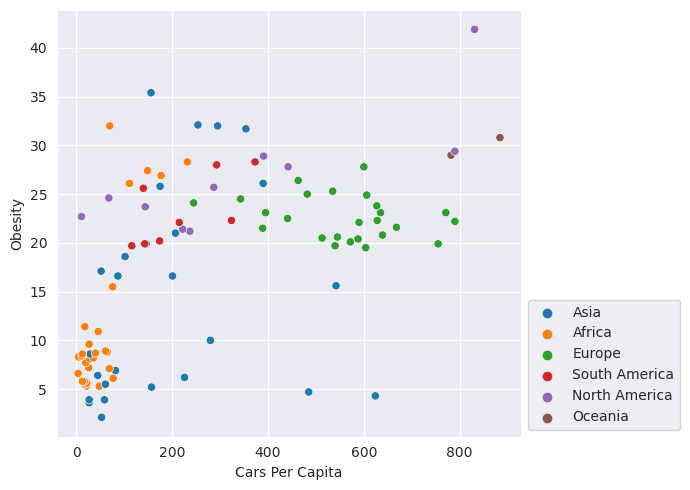

In [22]:

# Making the visualization

plt.figure(figsize=(7,5),layout='tight')
sns.scatterplot(x="Cars Per Capita", y="Obesity", data=cars,hue='Region')
plt.legend(bbox_to_anchor=(1,0),loc='lower left')


plt.show()

<br>
Here the relationship is not so obvious, so I will now try to add a regression line to attempt to visualize a relationship. Also below I will add labels to identify the key countries:
<br>
<br>

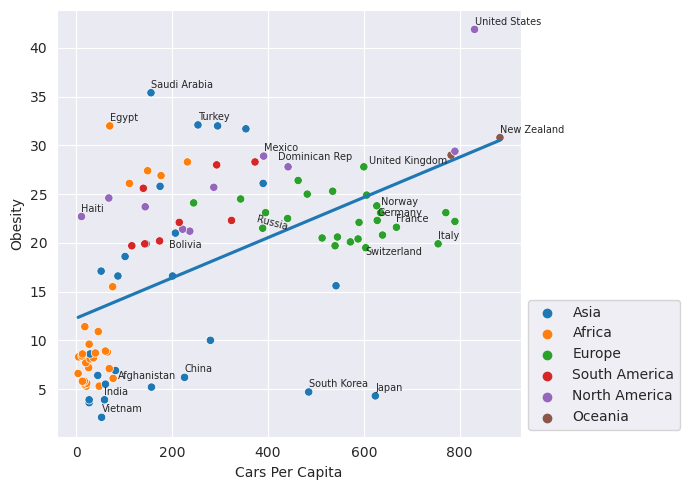

In [24]:
plt.figure(figsize=(7,5),layout='tight')
sns.regplot(x="Cars Per Capita", y="Obesity", data=cars, order=1, scatter=False, ci=None)
sns.scatterplot(x="Cars Per Capita", y="Obesity", data=cars,hue='Region')
plt.legend(bbox_to_anchor=(1,0),loc='lower left')

for x, y, z in zip(cars['Cars Per Capita'], cars['Obesity'],cars['Country']):
    if z in key_countries:
        if z == 'Afghanistan': 
            plt.text(x = x+25, y = y+0.5, s = z,size=7) 
        elif z == 'Norway': 
            plt.text(x = x, y = y+0.75, s = z,size=7)
        elif z == 'Dominican Republic': 
            plt.text(x = x-20, y = y+0.75, s = 'Dominican Rep',size=7)           
        elif z == 'United Kingdom': 
            plt.text(x = x+10, y = y+0.25, s =z,size=7)    
        elif z == 'Switzerland': 
            plt.text(x = x, y = y-0.75, s =z,size=7)           
        elif z == 'Bolivia': 
            plt.text(x = x+20, y = y-0.75, s =z,size=7)    
        elif z == 'Russia': 
            plt.text(x = x-20, y = y-1.75,s =z,size=7,rotation=-15)   
        else:
            plt.text(x = x, y = y+0.5, s = z,size=7) 

plt.show()

<br>
The data does not seem to fit a simple regression line so well. We could make a higher-order polynomial regression that would fit the data better but may be over-fitting our model
<br><br>

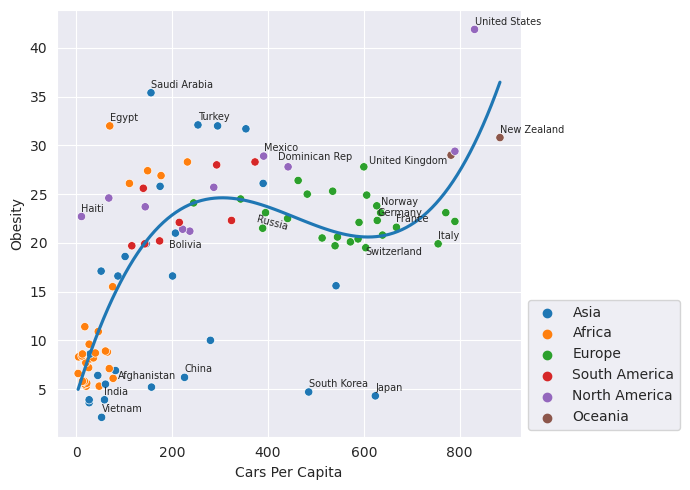

In [25]:
plt.figure(figsize=(7,5),layout='tight')
sns.regplot(x="Cars Per Capita", y="Obesity", data=cars, order=3, scatter=False, ci=None)
sns.scatterplot(x="Cars Per Capita", y="Obesity", data=cars,hue='Region')
plt.legend(bbox_to_anchor=(1,0),loc='lower left')

for x, y, z in zip(cars['Cars Per Capita'], cars['Obesity'],cars['Country']):
    if z in key_countries:
        if z == 'Afghanistan': 
            plt.text(x = x+25, y = y+0.5, s = z,size=7) 
        elif z == 'Norway': 
            plt.text(x = x, y = y+0.75, s = z,size=7)
        elif z == 'Dominican Republic': 
            plt.text(x = x-20, y = y+0.75, s = 'Dominican Rep',size=7)           
        elif z == 'United Kingdom': 
            plt.text(x = x+10, y = y+0.25, s =z,size=7)    
        elif z == 'Switzerland': 
            plt.text(x = x, y = y-0.75, s =z,size=7)           
        elif z == 'Bolivia': 
            plt.text(x = x+20, y = y-0.75, s =z,size=7)    
        elif z == 'Russia': 
            plt.text(x = x-20, y = y-1.75,s =z,size=7,rotation=-15)   
        else:
            plt.text(x = x, y = y+0.5, s = z,size=7) 

plt.show()

So here we can force a relationsip line. However it is a bit curvy, suggesting a relationship may exist when a country starts to add cars, then the relation is flat, but then comes back again. This may mean there is a non-linear relation or it could mean our line is over-fitting. More analysis would be needed

So let's see if there is a relationship if we filter the results to one global region

In [26]:
europe = cars[cars['Region']=='Europe']

In [27]:
europe.head()

,Country,Cars Per Capita,Obesity,Region,GDP Per Capita
41,Switzerland,604,19.5,Europe,71352.0
42,Denmark,540,19.7,Europe,60399.0
44,Italy,755,19.9,Europe,41840.0
47,Austria,572,20.1,Europe,55098.0
49,Netherlands,588,20.4,Europe,59229.0


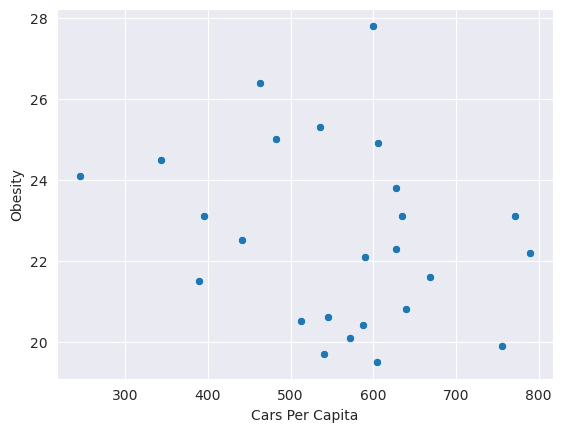

In [28]:
sns.scatterplot(x="Cars Per Capita", y="Obesity", data=europe)
plt.show()

Above it would appear there is again no linear relationsip when we just focus on Europe

So now we can do one more look with GDP per capita and obesity. It seems there is a smaller relationship

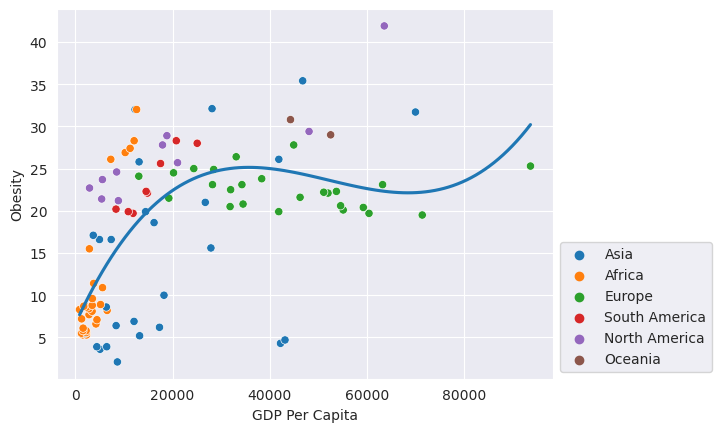

In [31]:
sns.regplot(x="GDP Per Capita", y="Obesity", data=cars, order=3, scatter=False, ci=None)
sns.scatterplot(x="GDP Per Capita", y="Obesity", data=cars,hue='Region')
plt.legend(bbox_to_anchor=(1,0),loc='lower left')

plt.show()